一个**对称正定矩阵**（Symmetric Positive Definite，SPD）$A\in\mathbb R^{n\times n}$满足：

1. **对称性**：

   $$
   A = A^\top.
   $$
2. **正定性**：

   $$
   \forall\,x\in\mathbb R^n\setminus\{0\},\quad x^\top A\,x > 0.
   $$

   这里的标量 $x^\top A\,x$ 就是所谓的**二次型**，它在 $A$ 为 SPD 时，对任何非零向量都严格为正。

数学和物理直观：

1. **二次型解读**

   $$
   q(x) = x^\top A\,x
   $$

   可看作把向量 $x$ 的“长度”按某种度量放大／缩小后再求平方和。$A$ SPD 时，所有方向上的“度量”都是正的，没有任何方向会“翻转”符号或让长度变为零。

2. **物理意义：弹簧系统**

   * 在质点—弹簧系统里，$A$ 经常是**刚度矩阵**（stiffness matrix），二次型 $x^\top A\,x$ 就是系统的**势能**。正定性保证：除去平移自由度（通常已在建模时固定），任何非零变形 $x$ 都会使势能正增长——也就是说，系统有一个稳定平衡点。

3. **几何意义：椭球面**
   方程 $x^\top A\,x = 1$ 描述一个中心在原点的椭球体。$A$ 的特征向量给出主轴方向，特征值的倒数给出相应主轴长度的平方。

数值和最优化中的意义：

1. **可逆性与良态性**
   SPD ⇒ $\det A>0$ ⇒ $A$ 可逆，且**条件数**$\kappa(A)=\lambda_{\max}/\lambda_{\min}$ 有限．良好的条件数意味着解线性系统或做矩阵分解时数值更稳定。

2. **Cholesky 分解**
   每个 SPD 矩阵都可以写成

   $$
     A = LL^\top,
   $$

   其中 $L$ 是下三角矩阵（Cholesky 因子）。比起一般的 LU 分解，速度更快，数值更稳健。

3. **凸优化中的 Hessian**
   在二次优化问题

   $$
     \min_x\; \tfrac12 x^\top A x - b^\top x + c,
   $$

   Hessian 矩阵恰好是 $A$。当且仅当 $A$ SPD 时，这个二次函数是**严格凸**的，会有唯一全局最小点。

在机器学习里的作用：

1. **协方差矩阵**
   在高斯分布、主成分分析（PCA）中，我们处理的协方差矩阵必须半正定，若其本身是 SPD，则说明所有方向上数据都有正方差，没有“退化”方向。

2. **核方法（Kernel Methods）**
   一个对称函数 $k(x,y)$ 要想做为有效的 Mercer 核，生成的 Gram 矩阵 $K_{ij}=k(x_i,x_j)$ 必须是**半正定**；若是 SPD，则核映射在样本上严格线性无冗余。

3. **度量学习（Mahalanobis 距离）**

   $$
     d_M(x,y) = \sqrt{(x-y)^\top M\,(x-y)},
   $$

   要保证 $d_M$ 是真正的距离，矩阵 $M$ 就需要是 SPD。

4. **正则化与优化**
   在训练线性模型时，加上二范数正则项

   $$
     \|w\|^2_{T} = w^\top T w,
   $$

   需要 $T$ SPD，才能确保正则项对所有非零 $w$ 都有惩罚作用，避免“平坦”方向。


构造对称正定矩阵（SPD）。首先构造随机正交矩阵与对角矩阵。对一个随机高斯矩阵做 QR 分解，得到正交矩阵 $Q\in\mathbb R^{n\times n}$，满足 $Q^{\top} Q=Q Q^{\top}=I$。利用正交矩阵可以保持向量长度和角度不变，用来“旋转”或“改变基底”，而不改变特征值。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate larger matrices (50x50)
n = 50

# Create SPD matrix: A = Q^T * D * Q where D has positive eigenvalues
Q = np.random.randn(n, n)
Q, _ = np.linalg.qr(Q)  # Orthogonal matrix
Q

array([[-0.07274766, -0.01785545,  0.09387651, ..., -0.17515249,
        -0.02785683,  0.0230325 ],
       [-0.04746462, -0.05179748, -0.1289131 , ..., -0.05936814,
         0.09313587, -0.30599539],
       [ 0.20729207, -0.06003521, -0.04886425, ...,  0.17642692,
        -0.04003565,  0.05054388],
       ...,
       [-0.15523594,  0.08607645,  0.11678791, ...,  0.02401979,
         0.22199217, -0.1788404 ],
       [ 0.10570409,  0.02266576, -0.07259087, ..., -0.11817191,
         0.10509548,  0.1492    ],
       [ 0.13418345, -0.11504374, -0.02525982, ...,  0.07366147,
         0.10036654, -0.02906392]], shape=(50, 50))

**QR 分解（QR Decomposition）** 是将一个矩阵 $A\in\mathbb{R}^{m\times n}$ 分解为两个矩阵的乘积

$$
A = Q\,R,
$$

其中：

* $Q\in\mathbb{R}^{m\times m}$（或 $\mathbb{R}^{m\times n}$）是**正交矩阵**（若 $m=n$ 则为方阵），满足

  $$
  Q^\top Q = I.
  $$
* $R\in\mathbb{R}^{m\times n}$（或 $\mathbb{R}^{n\times n}$）是**上三角矩阵**，即所有主对角线以下元素均为零。


In [ ]:
import numpy as np

def qr_householder(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy().astype(float)
    for k in range(min(m, n)):
        # construct reflection vector v
        x = R[k:, k]
        e1 = np.zeros_like(x); e1[0] = 1
        v = x + np.sign(x[0]) * np.linalg.norm(x) * e1 # boost the first element
        v = v / np.linalg.norm(v) # already normalized, hence np.inner(v, v) = 1
        print("v", v)    
        # construct Householder matrix Hk
        Hk = np.eye(m)
        Hk[k:, k:] -= 2.0 * np.outer(v, v) # 2 * v * v^T / v^T * v, where v^T * v = 1
        # apply to R and Q
        R = Hk @ R
        Q = Q @ Hk.T
    return Q, R

A = np.random.randn(5, 3)
Q, R = qr_householder(A)

print("Q.T @ Q == I", np.allclose(Q.T @ Q, np.eye(5)))
print("Q @ R == A", np.allclose(Q @ R, A))
print(np.round(R, 3))

v [ 0.70758513 -0.19214118  0.43605051  0.51421464  0.0885907 ]
v [-0.72957481 -0.07989741 -0.49426916  0.46587015]
v [-0.91019835 -0.25397103  0.32716613]
Q.T @ Q == I True
Q @ R == A True
[[-2.731 -0.289  1.013]
 [ 0.     2.047  1.008]
 [ 0.    -0.     1.7  ]
 [-0.     0.     0.   ]
 [-0.    -0.     0.   ]]


QR 分解的意义与应用。

1. **线性最小二乘**
   对于过定方程组 $\min_x \|Ax - b\|$：

   $$
   A = Q R,\quad
   \|Ax - b\| = \|Q R x - b\| = \|R x - Q^\top b\|.
   $$

   由于 $R$ 为上三角，通过回代即可高效求解最小二乘解。

2. **求解线性方程组**
   当 $A$ 为方阵且满秩时，可用 QR 代替 LU，数值更稳定。

3. **特征值算法**
   **QR 算法**：迭代地对矩阵做 QR 分解并交换顺序，能高效求取所有特征值。

4. **计算秩与正交投影**

   * 矩阵 $A$ 的列空间基由 $Q$ 的前几列给出。
   * 投影矩阵 $P = Q Q^\top$。

5. **数值稳定性**
   与直接消元相比，QR 分解（尤其 Householder 方式）对舍入误差更鲁棒。

In [ ]:
# Check symmetry
print(f"Is symmetric: {np.allclose(A_spd, A_spd.T)}")

# Eigenvalues
eigenvals_spd = eigvals(A_spd)
print(f"Eigenvalue range: [{np.min(eigenvals_spd):.4f}, {np.max(eigenvals_spd):.4f}]")
print(f"All eigenvalues > 0: {np.all(eigenvals_spd > 0)}")

# Trace
trace_spd = np.trace(A_spd)
print(f"Trace: {trace_spd:.4f}")

# Condition number
cond_num_spd = np.linalg.cond(A_spd)
print(f"Condition number: {cond_num_spd:.4f}")

# Determinant (log scale for large matrices)
det_spd = np.linalg.det(A_spd)
log_det_spd = np.linalg.slogdet(A_spd)[1]
print(f"Log determinant: {log_det_spd:.4f}")

Is symmetric: True
Eigenvalue range: [0.1197+0.0000j, 9.5329+0.0000j]
All eigenvalues > 0: True
Trace: 241.5778
Condition number: 79.6249
Log determinant: 65.1459


Matrix size: (50, 50)
Is symmetric: True
Eigenvalue range: [-0.000000+0.000000j, 4.9946+0.0000j]
Number of zero eigenvalues: 10
All eigenvalues >= 0: True
Trace: 104.8805
Condition number: 1.57e+18
Determinant: 1.62e-147
Matrix size: (50, 50)
Is symmetric: True
Eigenvalue range: [-9.9567+0.0000j, -0.2424+0.0000j]
All eigenvalues < 0: True
Trace: -282.4279
Condition number: 41.0797
Log determinant: 75.3376
Property                  SPD             SPSD            SND            
----------------------------------------------------------------------
Matrix size               (50, 50)        (50, 50)        (50, 50)       
Min eigenvalue            0.1197+0.0000j  -0.000000+0.000000j -9.9567+0.0000j
Max eigenvalue            9.5329+0.0000j  4.9946+0.0000j  -0.2424+0.0000j
Trace                     241.5778        104.8805        -282.4279      
Condition number          7.96e+01        1.57e+18        4.11e+01       
Rank                      50              40              50            

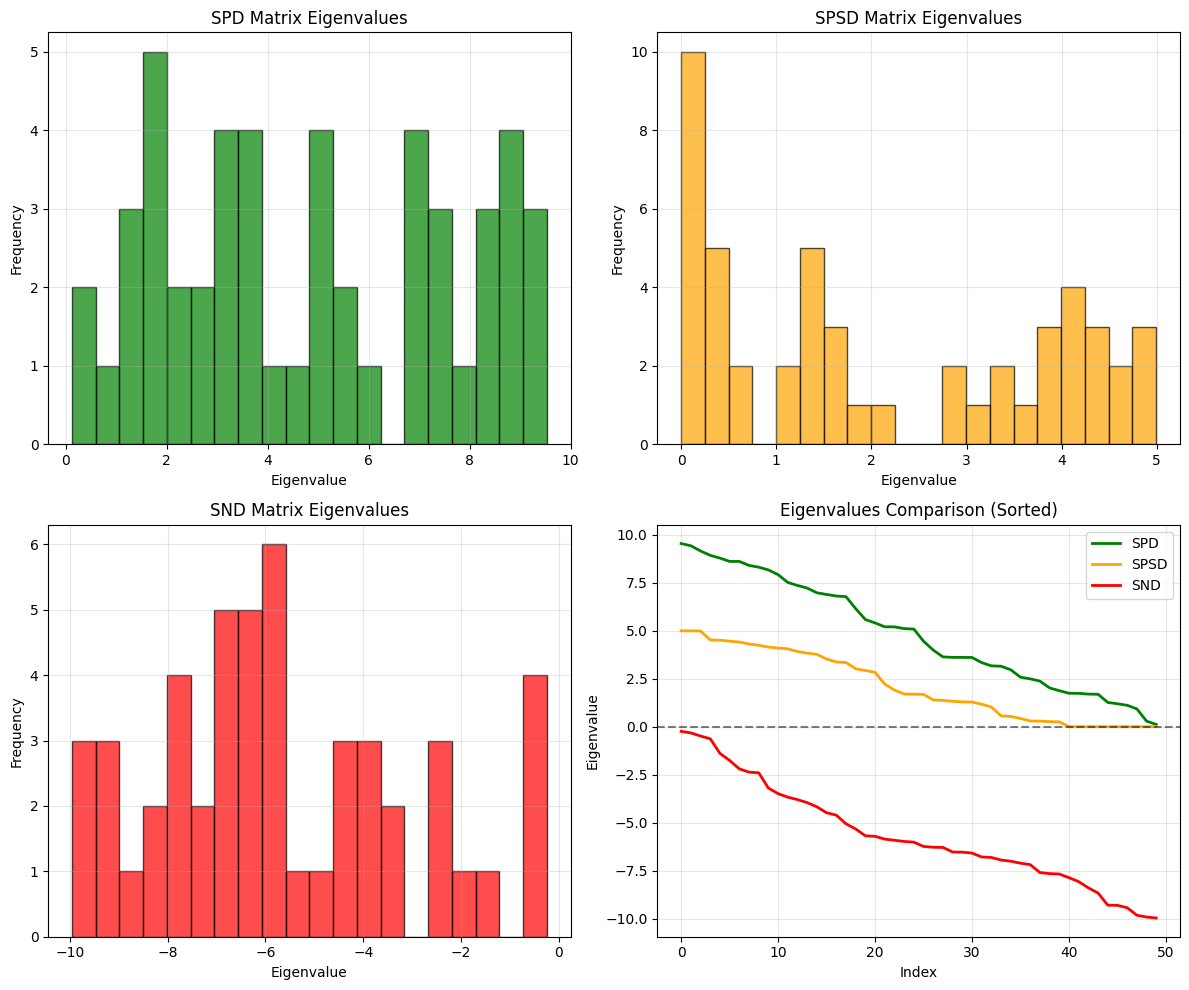

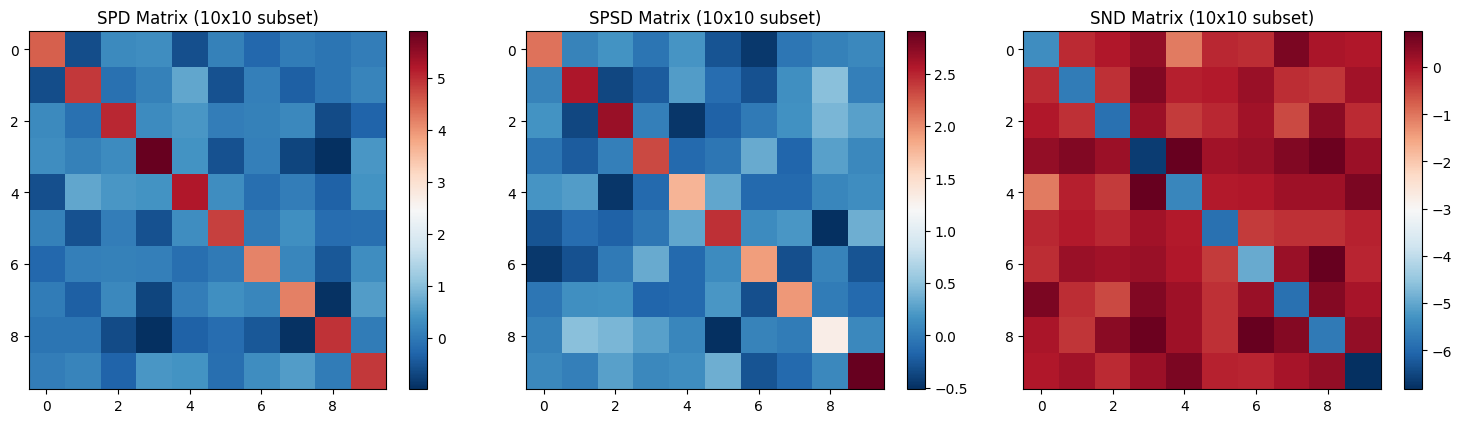


=== Linear System Solving Performance ===
SPD system residual: 8.24e-15
SPSD system residual (least squares): 2.03e+00
Note: SND matrices are not suitable for typical linear system solving


In [30]:
# Create SPSD matrix with some zero eigenvalues
D_semi = np.diag(np.concatenate([np.random.uniform(0.1, 5, n-10), np.zeros(10)]))
A_spsd = Q.T @ D_semi @ Q
print(f"Matrix size: {A_spsd.shape}")

# Check symmetry
print(f"Is symmetric: {np.allclose(A_spsd, A_spsd.T)}")

# Eigenvalues
eigenvals_spsd = eigvals(A_spsd)
print(f"Eigenvalue range: [{np.min(eigenvals_spsd):.6f}, {np.max(eigenvals_spsd):.4f}]")
print(f"Number of zero eigenvalues: {np.sum(np.abs(eigenvals_spsd) < 1e-10)}")
print(f"All eigenvalues >= 0: {np.all(eigenvals_spsd >= -1e-10)}")

# Trace
trace_spsd = np.trace(A_spsd)
print(f"Trace: {trace_spsd:.4f}")

# Condition number (will be very large or infinite)
cond_num_spsd = np.linalg.cond(A_spsd)
print(f"Condition number: {cond_num_spsd:.2e}")

# Determinant
det_spsd = np.linalg.det(A_spsd)
print(f"Determinant: {det_spsd:.2e}")

# Create SND matrix with negative eigenvalues
D_neg = np.diag(-np.random.uniform(0.1, 10, n))  # Negative eigenvalues
A_snd = Q.T @ D_neg @ Q
print(f"Matrix size: {A_snd.shape}")

# Check symmetry
print(f"Is symmetric: {np.allclose(A_snd, A_snd.T)}")

# Eigenvalues
eigenvals_snd = eigvals(A_snd)
print(f"Eigenvalue range: [{np.min(eigenvals_snd):.4f}, {np.max(eigenvals_snd):.4f}]")
print(f"All eigenvalues < 0: {np.all(eigenvals_snd < 0)}")

# Trace
trace_snd = np.trace(A_snd)
print(f"Trace: {trace_snd:.4f}")

# Condition number
cond_num_snd = np.linalg.cond(A_snd)
print(f"Condition number: {cond_num_snd:.4f}")

# Determinant
det_snd = np.linalg.det(A_snd)
log_det_snd = np.linalg.slogdet(A_snd)[1]
print(f"Log determinant: {log_det_snd:.4f}")

# Summary comparison
print(f"{'Property':<25} {'SPD':<15} {'SPSD':<15} {'SND':<15}")
print("-" * 70)
print(f"{'Matrix size':<25} {str(A_spd.shape):<15} {str(A_spsd.shape):<15} {str(A_snd.shape):<15}")
print(f"{'Min eigenvalue':<25} {np.min(eigenvals_spd):<15.4f} {np.min(eigenvals_spsd):<15.6f} {np.min(eigenvals_snd):<15.4f}")
print(f"{'Max eigenvalue':<25} {np.max(eigenvals_spd):<15.4f} {np.max(eigenvals_spsd):<15.4f} {np.max(eigenvals_snd):<15.4f}")
print(f"{'Trace':<25} {trace_spd:<15.4f} {trace_spsd:<15.4f} {trace_snd:<15.4f}")
print(f"{'Condition number':<25} {cond_num_spd:<15.2e} {cond_num_spsd:<15.2e} {cond_num_snd:<15.2e}")
print(f"{'Rank':<25} {np.linalg.matrix_rank(A_spd):<15} {np.linalg.matrix_rank(A_spsd):<15} {np.linalg.matrix_rank(A_snd):<15}")

# Visualization of eigenvalue distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Eigenvalue histograms
axes[0, 0].hist(eigenvals_spd, bins=20, alpha=0.7, color='green', edgecolor='black')
axes[0, 0].set_title('SPD Matrix Eigenvalues')
axes[0, 0].set_xlabel('Eigenvalue')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(eigenvals_spsd, bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[0, 1].set_title('SPSD Matrix Eigenvalues')
axes[0, 1].set_xlabel('Eigenvalue')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(eigenvals_snd, bins=20, alpha=0.7, color='red', edgecolor='black')
axes[1, 0].set_title('SND Matrix Eigenvalues')
axes[1, 0].set_xlabel('Eigenvalue')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# Eigenvalue comparison plot
axes[1, 1].plot(sorted(eigenvals_spd, reverse=True), 'g-', label='SPD', linewidth=2)
axes[1, 1].plot(sorted(eigenvals_spsd, reverse=True), 'orange', label='SPSD', linewidth=2)
axes[1, 1].plot(sorted(eigenvals_snd, reverse=True), 'r-', label='SND', linewidth=2)
axes[1, 1].set_title('Eigenvalues Comparison (Sorted)')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Eigenvalue')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Matrix structure visualization (showing sparsity pattern of a subset)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Show 10x10 subset for visualization
subset_size = 10
matrices = [A_spd[:subset_size, :subset_size], 
           A_spsd[:subset_size, :subset_size], 
           A_snd[:subset_size, :subset_size]]
titles = ['SPD Matrix (10x10 subset)', 'SPSD Matrix (10x10 subset)', 'SND Matrix (10x10 subset)']

for i, (matrix, title) in enumerate(zip(matrices, titles)):
    im = axes[i].imshow(matrix, cmap='RdBu_r', aspect='equal')
    axes[i].set_title(title)
    plt.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()

# Performance comparison for solving linear systems
print("\n=== Linear System Solving Performance ===")
b = np.random.randn(n)

# Only solve for SPD (others may not be solvable or well-conditioned)
try:
    x_spd = np.linalg.solve(A_spd, b)
    residual_spd = np.linalg.norm(A_spd @ x_spd - b)
    print(f"SPD system residual: {residual_spd:.2e}")
except:
    print("SPD system: Failed to solve")

try:
    x_spsd = np.linalg.lstsq(A_spsd, b, rcond=None)[0]
    residual_spsd = np.linalg.norm(A_spsd @ x_spsd - b)
    print(f"SPSD system residual (least squares): {residual_spsd:.2e}")
except:
    print("SPSD system: Failed to solve")

print(f"Note: SND matrices are not suitable for typical linear system solving")

- SPD 矩阵：可以用高斯消元或 Cholesky 分解高效且稳定地解出 $Ax=b$，残差通常很小；
- SPSD 矩阵：由于秩亏，$Ax=b$ 可能无解或不唯一，故采用最小二乘解 $\min _{x}\|A x-b\|_{2}$；

分解成“先变换再求长度”的形式。

因为 $A$ 是 SPD，就存在唯一的**平方根分解**

$$
A = L\,L^\top,
$$

其中 $L$ 是可逆的下三角矩阵（Cholesky 因子），也可以取对称的正定平方根 $L=A^{1/2}$。于是

$$
q(x) \;=\; x^\top A\,x \;=\; x^\top (L\,L^\top)\,x 
\;=\; (L^\top x)^\top (L^\top x)
\;=\;\|\,L^\top x\,\|_2^2.
$$

**直观地**：

1. **先用线性变换** $L^\top$ 把原始向量 $x$ “扭曲”到一个新向量 $y=L^\top x$。
2. **再对新向量 $y$ 计算欧氏长度的平方** $\|y\|^2$。

> 换句话说，二次型 $q(x)$ 就是先对 $x$ 做一次坐标变换（改变度量标准），再在新坐标系里量长度。

在特征向量基底里的“坐标缩放”。

再看另一种常用分解——**特征分解**

$$
A = Q^\top \,D\,Q,
$$

其中

* $Q$ 是正交矩阵（列向量是单位特征向量），
* $D=\mathrm{diag}(\lambda_1,\dots,\lambda_n)$，且所有 $\lambda_i>0$。

令 $y = Q\,x$，那么

$$
q(x) = x^\top Q^\top D\,Q\,x = y^\top D\,y = \sum_{i=1}^n \lambda_i\,y_i^2.
$$

**解读**：

* 第一步 $y=Qx$ 把 $x$ 坐到“特征向量”方向的坐标系中，分量记为 $(y_1,\dots,y_n)$。
* 第二步 $\sum \lambda_i\,y_i^2$ 相当于对每一个坐标分量 $y_i$ 乘以一个正的**权重** $\lambda_i$ 再求和。

这样，$q(x)$ 对每个方向的放大／缩小都由对应的 $\lambda_i$ 决定：

* $\lambda_i$ 大 ⇒ 在第 $i$ 个方向上“度量”更严格（同样大小的 $y_i$ 会贡献更多的能量）；
* $\lambda_i$ 小 ⇒ 在该方向上度量宽松一些。

 几何层面：等高面是椭球。

把 $q(x)=c$（某个常数）看作一个方程，就得到一个**中心在原点的椭球面**：

$$
\{\,x\mid x^\top A x = c\}
\;\cong\;
\{\,y\mid y^\top D\,y = c\}
\;\Longrightarrow\;
\sum_{i=1}^n \lambda_i\,y_i^2 = c.
$$

* 在 $y$ 坐标里，是一个轴长为 $\sqrt{c/\lambda_i}$ 的标准椭球。
* 在原始 $x$ 坐标里，椭球的主轴方向就是 $Q$ 的列向量，轴长同样由 $\lambda_i$ 决定。

> **直观**：沿着某个特征方向，$x$ 需移动更远（或者说分量更大）才能使二次型达到同样的值——如果对应特征值 $\lambda_i$ 很大，椭球在这个方向就“扁平”得很，不容易伸展。

总结：$q(x)$ 对 $x$ 做了什么？

1. **度量度变换**：它用一个线性算子（Cholesky 因子或特征分解中的 $Q,D$）先把 $x$ 映射到新的坐标系。
2. **各方向加权**：在新坐标系里，对每个分量乘以一个正数（权重），再求平方和。
3. **结果**：不像普通的 $\|x\|^2$ 那样各分量一视同仁，$q(x)$ 根据矩阵 $A$ 的特征值给不同方向赋予不同“重要性”或“成本”。

* 如果把 $\|x\|^2$ 想成“在各个方向上都一样的球”，那么 $q(x)$ 就是**拉伸／压扁**了这个球，变成一个**椭球**，在 SPD 保证下不会倒置或坍塌（无零长度方向）。
* 在机器学习中，这种带权重的距离（Mahalanobis 距离）、带权重的正则化、二次型目标函数等，都依赖 SPD 矩阵来定义——你可以理解成给不同特征维度或者方向打分、赋价。